In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [4]:
from google.colab import files
uploaded = files.upload()


Saving 1729258-1613615-Stock_Price_data_set_(1).xlsx to 1729258-1613615-Stock_Price_data_set_(1).xlsx


In [5]:
# Importing data
df = pd.read_excel('1729258-1613615-Stock_Price_data_set_(1).xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
# Check shape of the dataset
df.shape

(1009, 7)

In [7]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [8]:
# Description of the dataset
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [9]:
# Sum of null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
# Looking for the unique values
df.nunique()

,0
Date,1009
Open,976
High,983
Low,989
Close,988
Adj Close,988
Volume,1005


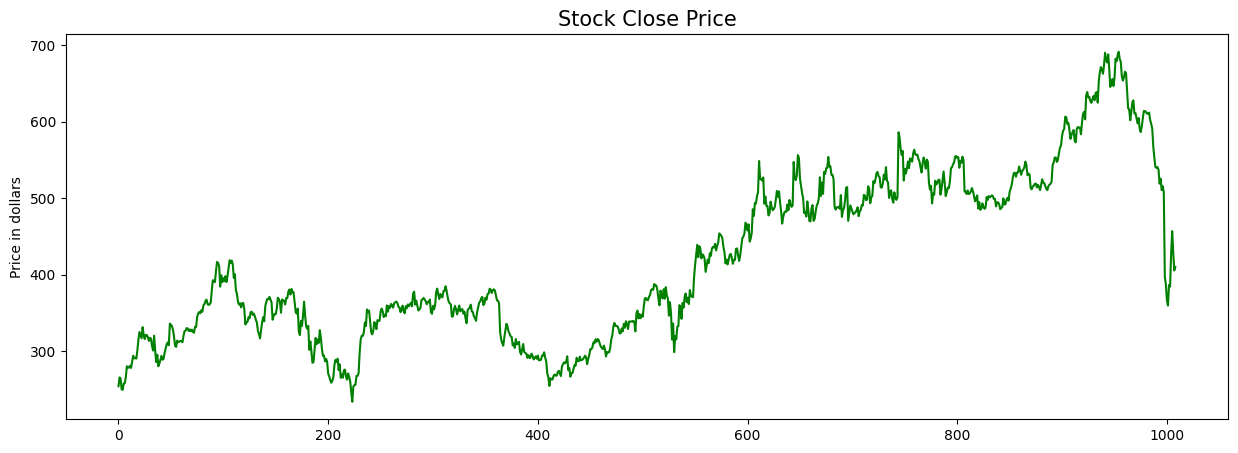

In [43]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color="green")
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [12]:
# Splitting the data into training and testing sets

df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])             #70% used as a training data
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])   #30% used as a testing data

print(df_train.shape)
print(df_test.shape)

(706, 1)
(303, 1)


In [13]:
# Checking the output of training & testing sets
df_train.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [14]:
df_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [15]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
df_train_array = scaler.fit_transform(df_train)
df_train_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [17]:
df_train_array.shape

(706, 1)

In [18]:

X_train = []
y_train = []

for i in range(100,df_train_array.shape[0]):
    X_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [19]:
model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

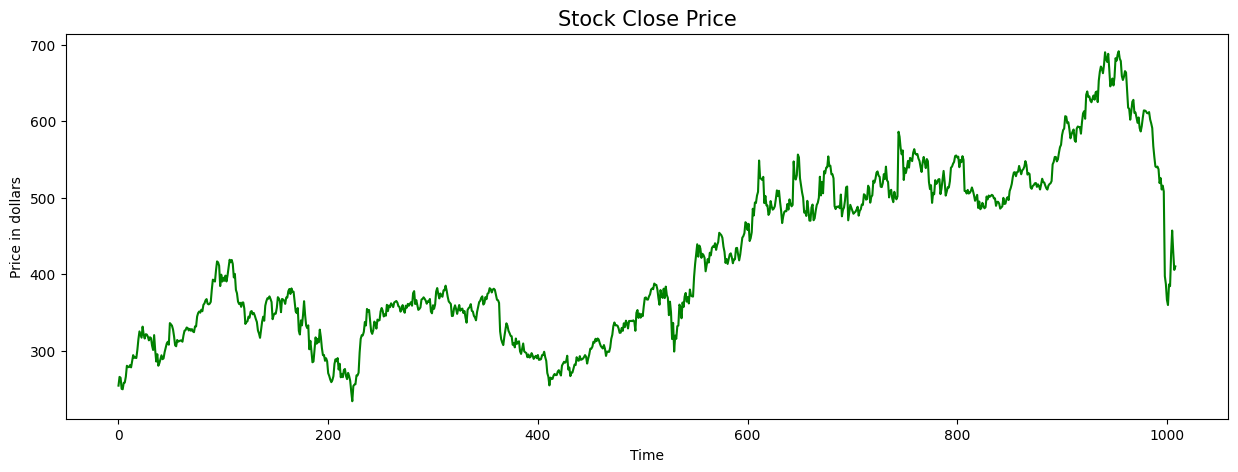

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
import matplotlib.pyplot as plt

# 📊 Plot Stock Closing Price
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color="green")
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.xlabel('Time')
plt.show()

# 🧠 Show model summary (if it's a Keras model)
model.summary()


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(X_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )

Epoch 1/50
19/19 - 11s - 556ms/step - loss: 0.0866
Epoch 2/50
19/19 - 9s - 466ms/step - loss: 0.0250
Epoch 3/50
19/19 - 6s - 318ms/step - loss: 0.0185
Epoch 4/50
19/19 - 9s - 459ms/step - loss: 0.0167
Epoch 5/50
19/19 - 5s - 249ms/step - loss: 0.0152
Epoch 6/50
19/19 - 5s - 287ms/step - loss: 0.0138
Epoch 7/50
19/19 - 6s - 307ms/step - loss: 0.0140
Epoch 8/50
19/19 - 10s - 537ms/step - loss: 0.0135
Epoch 9/50
19/19 - 9s - 474ms/step - loss: 0.0141
Epoch 10/50
19/19 - 6s - 312ms/step - loss: 0.0115
Epoch 11/50
19/19 - 4s - 223ms/step - loss: 0.0127
Epoch 12/50
19/19 - 6s - 331ms/step - loss: 0.0125
Epoch 13/50
19/19 - 9s - 490ms/step - loss: 0.0113
Epoch 14/50
19/19 - 5s - 277ms/step - loss: 0.0108
Epoch 15/50
19/19 - 5s - 251ms/step - loss: 0.0112
Epoch 16/50
19/19 - 7s - 350ms/step - loss: 0.0103
Epoch 17/50
19/19 - 4s - 212ms/step - loss: 0.0092
Epoch 18/50
19/19 - 6s - 292ms/step - loss: 0.0090
Epoch 19/50
19/19 - 5s - 260ms/step - loss: 0.0102
Epoch 20/50
19/19 - 4s - 211ms/step - 

In [22]:
df_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [23]:
df_train.tail()

,Close
701,479.100006
702,480.630005
703,481.790009
704,484.670013
705,488.239990


In [24]:
past_100_days = df_train.tail(100)

In [28]:
final_df = pd.concat([past_100_days, df_test], ignore_index=True)


In [29]:

input_data = scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [30]:
input_data.shape

(403, 1)

In [33]:
X_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  X_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

X_test,y_test=np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [34]:
y_pred = model.predict(X_test)
print(y_pred.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
(303, 1)


In [42]:
X_test

array([[[0.35299258],
        [0.40395792],
        [0.40200005],
        ...,
        [0.36775204],
        [0.37642702],
        [0.38718028]],

       [[0.40395792],
        [0.40200005],
        [0.43097681],
        ...,
        [0.37642702],
        [0.38718028],
        [0.35217924]],

       [[0.40200005],
        [0.43097681],
        [0.4459773 ],
        ...,
        [0.38718028],
        [0.35217924],
        [0.37103526]],

       ...,

       [[0.71996134],
        [0.69155689],
        [0.65682703],
        ...,
        [0.07427927],
        [0.20313866],
        [0.29347268]],

       [[0.69155689],
        [0.65682703],
        [0.67221901],
        ...,
        [0.20313866],
        [0.29347268],
        [0.21018706]],

       [[0.65682703],
        [0.67221901],
        [0.68315309],
        ...,
        [0.29347268],
        [0.21018706],
        [0.13825716]]])

In [35]:
y_test

array([0.35217924, 0.37103526, 0.37742098, 0.39657814, 0.39459021,
       0.43639862, 0.43278411, 0.41513293, 0.41751255, 0.47013471,
       0.46073667, 0.4033254 , 0.42588629, 0.43230216, 0.49013517,
       0.48218326, 0.49739453, 0.52170251, 0.52637129, 0.50968392,
       0.50492488, 0.46621878, 0.46468256, 0.48019515, 0.51558778,
       0.49667165, 0.54528743, 0.49146052, 0.48525552, 0.42407899,
       0.44938103, 0.45392929, 0.41989216, 0.40528327, 0.44606766,
       0.42519346, 0.41651858, 0.42793452, 0.68267123, 0.66309233,
       0.61890412, 0.59363241, 0.60914481, 0.49272575, 0.53887156,
       0.52016629, 0.54019691, 0.5676676 , 0.54143199, 0.57971616,
       0.57558954, 0.56694472, 0.60053014, 0.61414507, 0.59607223,
       0.59284922, 0.59513848, 0.57724637, 0.56784832, 0.54375121,
       0.52435321, 0.56161335, 0.58348133, 0.56326999, 0.5396246 ,
       0.57513783, 0.56664358, 0.48495438, 0.45661014, 0.47197207,
       0.40251206, 0.44200125, 0.43627821, 0.49206299, 0.47688

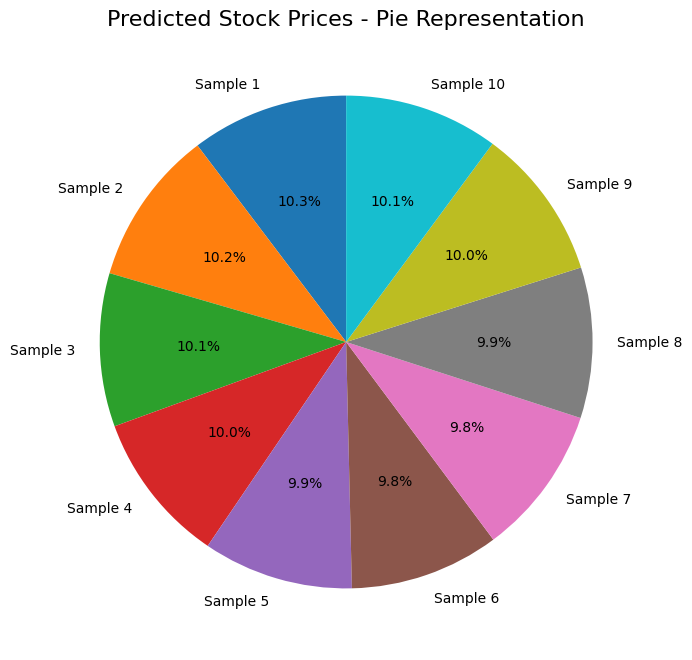

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to 1D array
y_pred_flat = np.array(y_pred).flatten()

# Optional: Limit to first N predictions for clarity
N = 10
y_pred_sample = y_pred_flat[:N]

# Labels for each slice
labels = [f'Sample {i+1}' for i in range(N)]

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(y_pred_sample, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Predicted Stock Prices - Pie Representation', fontsize=16)
plt.show()


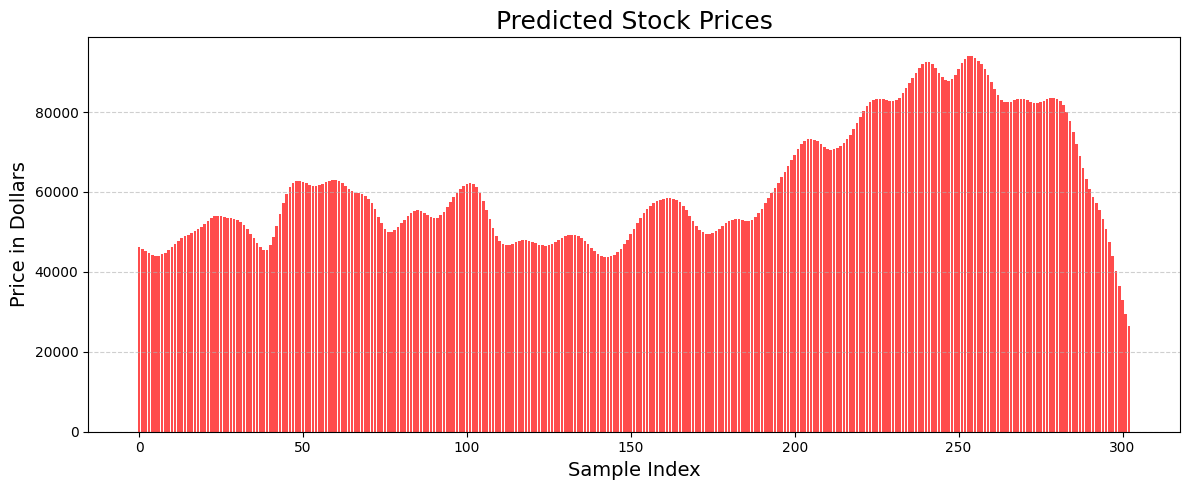

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Just for safety, convert to 1D array
y_pred_flat = np.array(y_pred).flatten()

plt.figure(figsize=(12,5))
plt.bar(range(len(y_pred_flat)), y_pred_flat, color='red', alpha=0.7)
plt.title('Predicted Stock Prices', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Price in Dollars', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [36]:
y_pred

array([[0.4199749 ],
       [0.4149281 ],
       [0.40990165],
       [0.40535432],
       [0.40189964],
       [0.39988893],
       [0.40004003],
       [0.40253225],
       [0.406871  ],
       [0.41232833],
       [0.4188365 ],
       [0.42619273],
       [0.43328005],
       [0.43922126],
       [0.4435979 ],
       [0.4472131 ],
       [0.45072773],
       [0.45466945],
       [0.45953172],
       [0.46552613],
       [0.47230518],
       [0.4792823 ],
       [0.48514774],
       [0.48876813],
       [0.48973283],
       [0.48888686],
       [0.4868951 ],
       [0.48532614],
       [0.48427764],
       [0.48331305],
       [0.48076522],
       [0.47599095],
       [0.46919182],
       [0.46042785],
       [0.44985327],
       [0.43878204],
       [0.42830867],
       [0.4192436 ],
       [0.41241395],
       [0.41318753],
       [0.4237593 ],
       [0.4426959 ],
       [0.46701774],
       [0.49361643],
       [0.51849115],
       [0.53930974],
       [0.5544517 ],
       [0.563

In [37]:
scaler.scale_

array([0.00301214])

In [38]:
scale_factor = 1/0.00301214
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

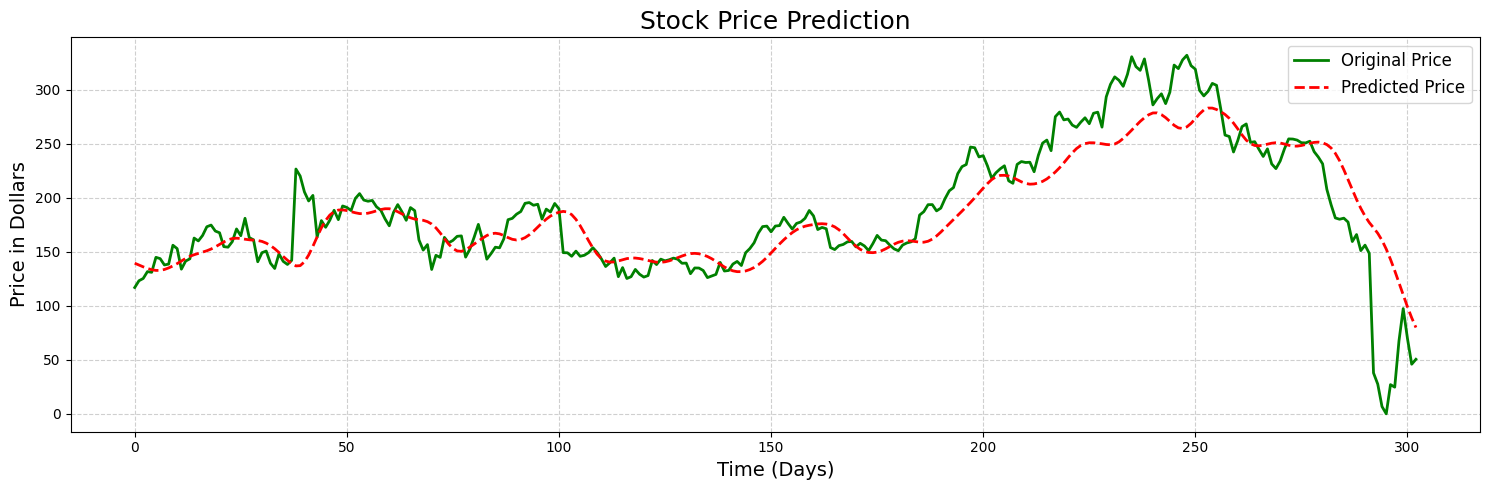

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Original Price in Green
plt.plot(y_test, color='green', label='Original Price', linewidth=2)

# Predicted Price in Red (dashed)
plt.plot(y_pred, color='red', linestyle='--', label='Predicted Price', linewidth=2)

# Title & Labels
plt.title('Stock Price Prediction', fontsize=18)
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Price in Dollars', fontsize=14)

# Grid & Legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
